# import libraries

In [235]:
import pandas as pd
import numpy as np

# visualization libararies
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from scipy.stats import shapiro,kstest,normaltest,zscore,skew

import pickle 
import json

import warnings 
warnings.filterwarnings("ignore")


# Problem Statement

# Data Gathering

In [2]:
df=pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# function for outliers detection
def detect_outliers(column):
    q1=df[column].quantile(0.25)
    q2=df[column].quantile(0.50)
    q3=df[column].quantile(0.75)

    iqr=q3-q1

    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr

    print("upper_tail:",upper_tail)
    print("lower_tail:",lower_tail)

    outliers=df[[column]].loc[(df[column]>upper_tail)|(df[column]<lower_tail)]
    sns.boxplot(df[column])
    return outliers
    

In [17]:
def missing_values(column):
    miss_values=df[column].isna().sum()
    return "Missing values are",miss_values
    

### 1.age

In [18]:
df['age'].dtype

dtype('int64')

In [19]:
missing_values('age')

('Missing values are', 0)

upper_tail: 87.0
lower_tail: -9.0


,age


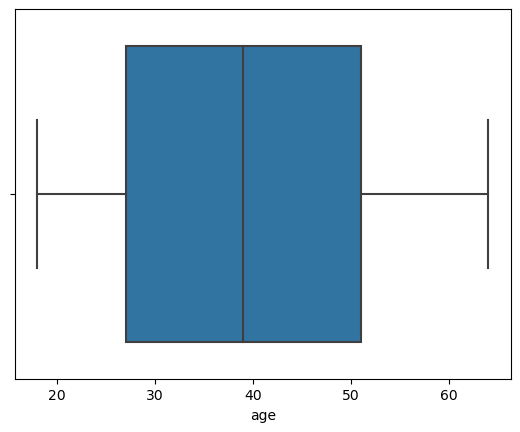

In [7]:
detect_outliers("age")

### 2.sex

In [20]:
missing_values('sex')

('Missing values are', 0)

In [10]:
df['sex'].dtype # object dtype 

# we have to convert into int or float

dtype('O')

In [21]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [23]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [28]:
df['sex'].replace({'male': 1, 'female': 0},inplace=True)
df['sex'].dtype

dtype('int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [33]:
df['sex'].isna().sum()

0

In [31]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

upper_tail: 2.5
lower_tail: -1.5


,sex


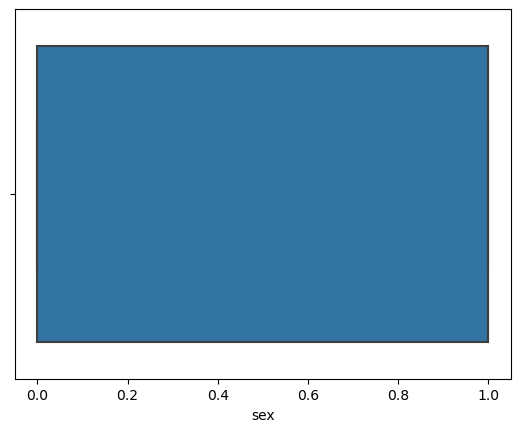

In [32]:
detect_outliers('sex')

### 3.bmi

In [35]:
df['bmi'].isna().sum()

0

In [36]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [38]:
df['bmi'].dtype

dtype('float64')

upper_tail: 47.290000000000006
lower_tail: 13.7


,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


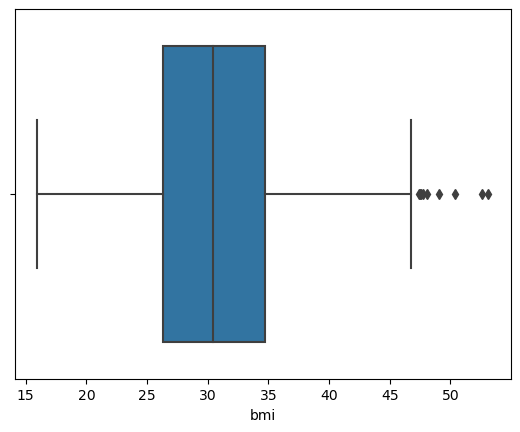

In [40]:
detect_outliers('bmi') # outliers are present

### 4.children

In [41]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [42]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [44]:
df['children'].isna().sum() # NO missing values

0

In [45]:
df['children'].dtype

dtype('int64')

upper_tail: 5.0
lower_tail: -3.0


,children


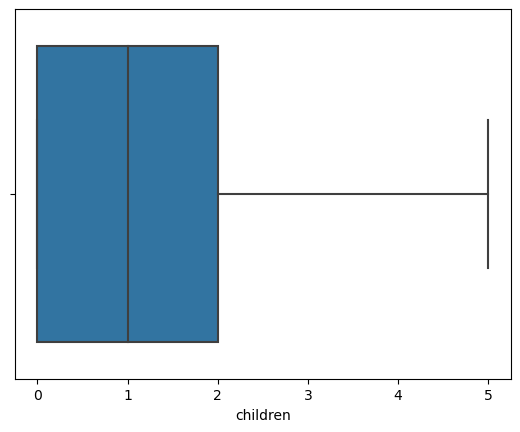

In [46]:
detect_outliers("children")

### 5.smoker

In [47]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [48]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [49]:
df['smoker'].dtype

dtype('O')

In [50]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [51]:
df['smoker'].replace({'no': 0, 'yes': 1},inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


### 6.region

In [54]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [55]:
df['region'].value_counts() # need to do encoding 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [59]:
df=pd.get_dummies(df,columns=['region'])

In [60]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# Feature Engineering

In [ ]:
# Impute outliers
# Impute missing values


# Feature Selection

In [ ]:
# In feature selection we  have filter method,wrapper method and embedded method for feature selection
# as this is linear regression algorithm we have two methods present in filter method
# 1.linearity
# 2. No Multicollinearity



### 1.Linearity

In [ ]:
# checking linear relationship between independent variable and dependent variable with correlation coefficient

In [65]:
df.corr().loc[['charges']]

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.0,0.006349,-0.039905,0.073982,-0.04321


<AxesSubplot:>

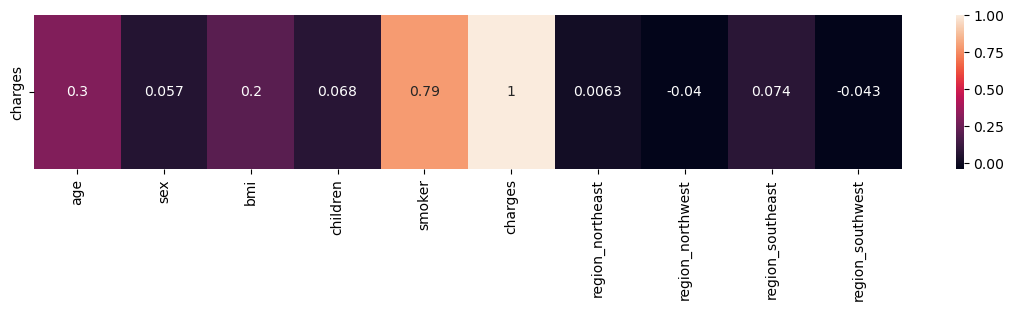

In [72]:
plt.figure(figsize=(14,2))
sns.heatmap(df.corr().loc[['charges']],annot=True)

### 2. No Multicollinearity

In [91]:
vif_factors_list=[]
x=df.drop("charges",axis=1)
for i in range(len(x.columns)):
    
    vif=variance_inflation_factor(x,i)
    vif_factors_list.append(vif)
vif_factors=pd.DataFrame(vif_factors_list,index=list(x.columns),columns=['VIF Factors'])
vif_factors

,VIF Factors
age,1.016822
sex,1.008900
bmi,1.106630
children,1.004011
smoker,1.012074
region_northeast,8.603069
region_northwest,8.636205
region_southeast,11.535195
region_southwest,9.218449


<AxesSubplot:>

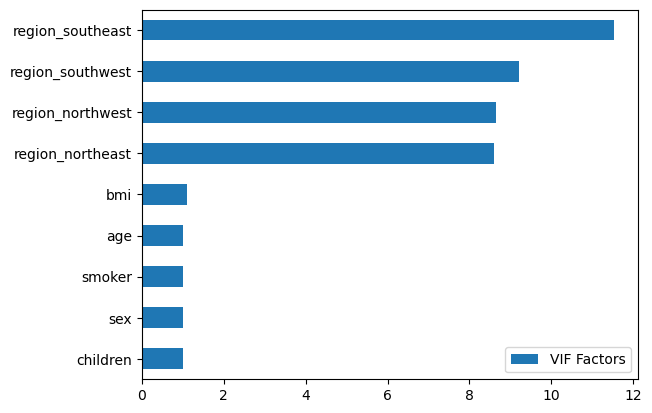

In [96]:
vif_factors.sort_values(['VIF Factors']).plot(kind='barh')

# Model Building

In [114]:
x=df.drop("charges",axis=1)
y=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

### Model Training

#### Linear Regression Model

In [120]:
# create instance and fit the model
lin_reg_model=LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

#### Model Evaluation

In [128]:
# testing
testing_accuracy_list=[]
def model_evaluation_testing(x_test,y_test,model_instance):
    y_pred=model_instance.predict(x_test)
    
    mae=mean_absolute_error(y_test,y_pred)
    print("MAE:",mae)
    print("-"*100)
    
    mse=mean_squared_error(y_test,y_pred)
    print("MSE:",mse)
    print("-"*100)
    
    rmse=np.sqrt(mse)
    print("RMSE:",rmse)
    
    print("-"*100)
    
    r2_value=r2_score(y_test,y_pred)
    print("R2 SCORE_testing:",r2_value)
    testing_accuracy_list.append(r2_value)
    

In [129]:
training_accuracy_list=[]
def model_evaluation_training(x_train,y_train,model_instance):
    y_pred_train=model_instance.predict(x_train)
    
    mae=mean_absolute_error(y_train,y_pred_train)
    print("MAE:",mae)
    print("-"*100)
    
    mse=mean_squared_error(y_train,y_pred_train)
    print("MSE:",mse)
    print("-"*100)
    
    rmse=np.sqrt(mse)
    print("RMSE:",rmse)
    
    print("-"*100)
    
    r2_value=r2_score(y_train,y_pred_train)
    print("R2 SCORE_training:",r2_value)
    training_accuracy_list.append(r2_value)
    

In [130]:
model_evaluation_testing(x_test,y_test,lin_reg_model)

MAE: 4319.450090036729
----------------------------------------------------------------------------------------------------
MSE: 41761889.1906428
----------------------------------------------------------------------------------------------------
RMSE: 6462.343939364632
----------------------------------------------------------------------------------------------------
R2 SCORE_testing: 0.7100098801471331


In [131]:
model_evaluation_training(x_train,y_train,lin_reg_model)

MAE: 4143.046171517503
----------------------------------------------------------------------------------------------------
MSE: 35240347.237063214
----------------------------------------------------------------------------------------------------
RMSE: 5936.358078575046
----------------------------------------------------------------------------------------------------
R2 SCORE_training: 0.7605423221866592


## 3 Normality of residual

In [ ]:
# residual should be normally distribyted

In [134]:
y_pred_train=lin_reg_model.predict(x_train)
residual_train=y_train-y_pred_train
residual_train

161     8090.248745
1032    -863.192931
151    -1773.429793
759     7859.747229
362    -9448.659650
           ...     
278    -1043.416856
432    -1208.553999
1283    -509.083163
1265   -8647.929236
1277   -1483.375170
Name: charges, Length: 1070, dtype: float64

### 3.1 KDE plot

<function matplotlib.pyplot.show(close=None, block=None)>

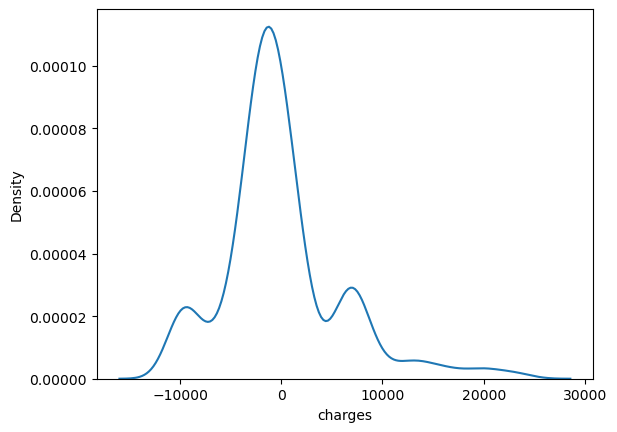

In [136]:
sns.kdeplot(residual_train)
plt.show

In [139]:
skewness=skew(residual_train)
skewness

1.1257542008869017

In [140]:
# skewness > 0.5 >>>> data is positively skewed

### 3.2 Hypothesis Testing

#### 3.2.1 shapiro test

In [143]:
_,p_val=shapiro(residual_train)
p_val

7.905083426139527e-25

In [152]:
print("P_Value:",p_val)
if p_val>=0.05:
    print("Null hypothesis is accepted ")
    print("Data is normally distributed")
else:
    print("Alternative Hypothesis accepted")
    print("Data is not normally distributed")

P_Value: 7.905083426139527e-25
Alternative Hypothesis accepted
Data is not normally distributed


#### 3.2.2 ks test

In [148]:
_,_p_val=kstest(residual_train,"norm")
p_val

7.905083426139527e-25

In [153]:
print("P_VALUE:",p_val)
if p_val>=0.05:
    print("Null Hypothesis is accepted")
    print("Data is normally distributed")
else:
    print("Alternative Hypothesis is accepted")
    print("Data is not normally distributed")

P_VALUE: 7.905083426139527e-25
Alternative Hypothesis is accepted
Data is not normally distributed


# 3.2.3 normal test

In [155]:
_,p_val=normaltest(residual_train)

In [156]:
print("P_VALUE:",p_val)
if p_val>=0.05:
    print("Null Hypothesis is accepted")
    print("Data is normally distributed")
else:
    print("Alternative Hypothesis is accepted")
    print("Data is not normally distributed")

P_VALUE: 1.1093146993502498e-47
Alternative Hypothesis is accepted
Data is not normally distributed


# 3.3 QQ Plot

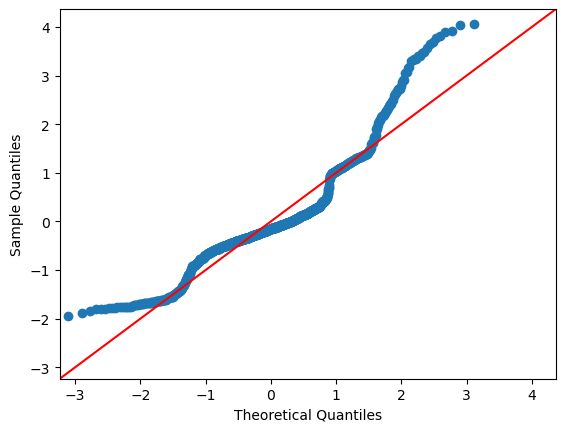

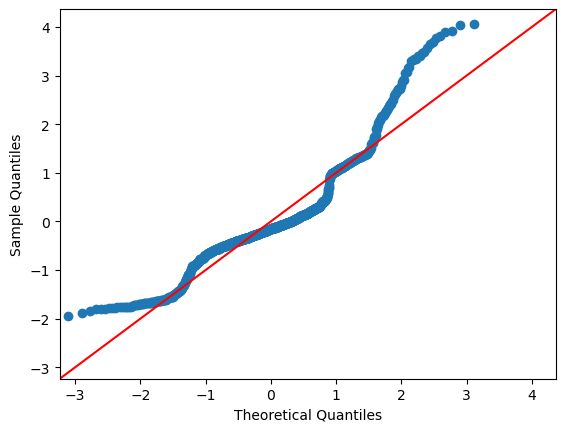

In [158]:
import statsmodels.api as sm
sm.qqplot(residual_train,line='45',fit=True)

### 4. Homoscadasticity

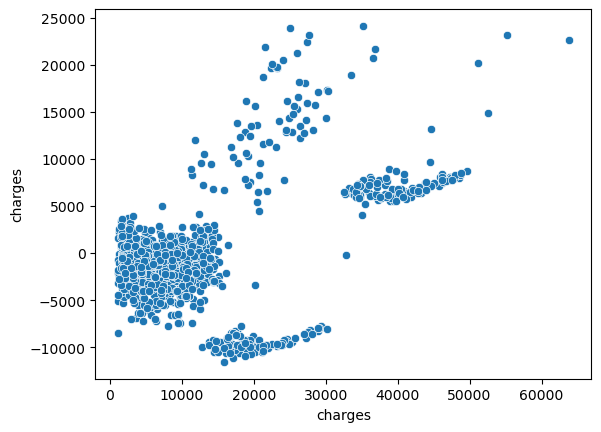

In [160]:
sns.scatterplot(x=y_train,y=residual_train)
plt.show()

In [161]:
training_accuracy_list

[0.7605423221866592]

In [162]:
testing_accuracy_list

[0.7100098801471331]

In [ ]:
# Now we will train a model on Ridge and Lasso regression

## Ridge Reg

In [164]:
ridge_reg_model=Ridge(alpha=1.0)
ridge_reg_model.fit(x_train,y_train)

Ridge()

In [165]:
ridge_reg_model.coef_

array([  261.67324785,   -53.67360974,   341.0813174 ,   408.47896537,
       23714.00378756,   387.27487075,    82.30275039,  -302.1114559 ,
        -167.46616524])

In [166]:
ridge_reg_model.intercept_

-12736.46791608106

### Model Evaluation for Ridge regresssion

In [167]:
# testing
model_evaluation_testing(x_test,y_test,ridge_reg_model)

MAE: 4327.357724541561
----------------------------------------------------------------------------------------------------
MSE: 41763189.38706967
----------------------------------------------------------------------------------------------------
RMSE: 6462.444536479185
----------------------------------------------------------------------------------------------------
R2 SCORE_testing: 0.710000851721337


In [168]:
model_evaluation_training(x_train,y_train,ridge_reg_model)

MAE: 4153.281436363145
----------------------------------------------------------------------------------------------------
MSE: 35243344.96844891
----------------------------------------------------------------------------------------------------
RMSE: 5936.610562303115
----------------------------------------------------------------------------------------------------
R2 SCORE_training: 0.7605219526428662


In [169]:
training_accuracy_list

[0.7605423221866592, 0.7605219526428662]

In [170]:
testing_accuracy_list

[0.7100098801471331, 0.710000851721337]

<AxesSubplot:xlabel='charges', ylabel='Density'>

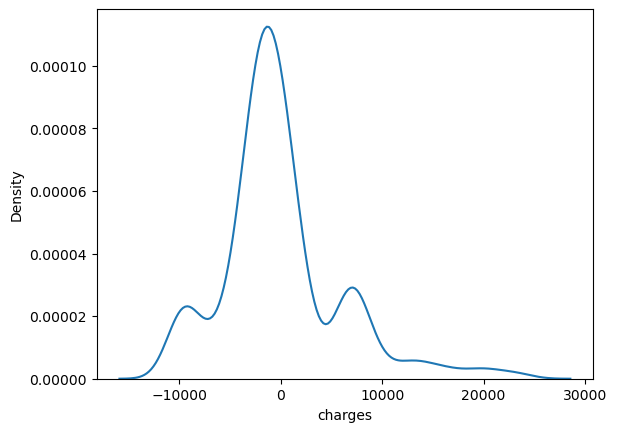

In [171]:
y_pred_train=ridge_reg_model.predict(x_train)
ridge_residuals=y_train-y_pred_train
sns.kdeplot(ridge_residuals)

#### hyperparameter tuning for ridge regression

#### GridSearchCV in ridge regression

In [173]:
ridge_reg_model=Ridge()
param_grid={"alpha":np.arange(0.01,3,0.01)}

gscv_ridge_reg_model=GridSearchCV(ridge_reg_model,param_grid,cv=5,n_jobs=-1)
gscv_ridge_reg_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [174]:
gscv_ridge_reg_model.best_estimator_

Ridge(alpha=0.49)

In [175]:
ridge_reg_model_gscv=gscv_ridge_reg_model.best_estimator_

In [176]:
ridge_reg_model_gscv

Ridge(alpha=0.49)

### model evaluation

In [177]:
model_evaluation_testing(x_test,y_test,ridge_reg_model_gscv)

MAE: 4323.333273269257
----------------------------------------------------------------------------------------------------
MSE: 41761845.40314636
----------------------------------------------------------------------------------------------------
RMSE: 6462.340551467893
----------------------------------------------------------------------------------------------------
R2 SCORE_testing: 0.7100101842028543


In [178]:
model_evaluation_training(x_train,y_train,ridge_reg_model_gscv)

MAE: 4148.068704461576
----------------------------------------------------------------------------------------------------
MSE: 35241071.19525862
----------------------------------------------------------------------------------------------------
RMSE: 5936.419054889792
----------------------------------------------------------------------------------------------------
R2 SCORE_training: 0.7605374029006164


In [179]:
training_accuracy_list

[0.7605423221866592, 0.7605219526428662, 0.7605374029006164]

In [180]:
testing_accuracy_list

[0.7100098801471331, 0.710000851721337, 0.7100101842028543]

### RandomizedSearchCV in ridge regression

In [181]:
ridge_reg_model=Ridge()
param_grid={"alpha":np.arange(0.01,3,0.01)}

rscv_ridge_reg_model=RandomizedSearchCV(ridge_reg_model,param_grid,cv=5,n_jobs=-1)
rscv_ridge_reg_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [182]:
rscv_ridge_reg_model.best_estimator_

Ridge(alpha=0.39)

In [185]:
ridge_reg_model_rscv=rscv_ridge_reg_model.best_estimator_
ridge_reg_model_rscv

Ridge(alpha=0.39)

#### model Evaluation 

In [186]:
# testing
model_evaluation_testing(x_test,y_test,ridge_reg_model_rscv)

MAE: 4322.542498860077
----------------------------------------------------------------------------------------------------
MSE: 41761747.337516345
----------------------------------------------------------------------------------------------------
RMSE: 6462.332963993448
----------------------------------------------------------------------------------------------------
R2 SCORE_testing: 0.7100108651601662


In [187]:
# training
model_evaluation_training(x_train,y_train,ridge_reg_model_rscv)

MAE: 4147.045970723214
----------------------------------------------------------------------------------------------------
MSE: 35240806.37927624
----------------------------------------------------------------------------------------------------
RMSE: 5936.396750494044
----------------------------------------------------------------------------------------------------
R2 SCORE_training: 0.7605392023215971


In [188]:
training_accuracy_list

[0.7605423221866592,
 0.7605219526428662,
 0.7605374029006164,
 0.7605392023215971]

In [189]:
testing_accuracy_list

[0.7100098801471331, 0.710000851721337, 0.7100101842028543, 0.7100108651601662]

## Lasso Regression

In [190]:
lasso_reg_model=Lasso(alpha=1.0)
lasso_reg_model.fit(x_train,y_train)


Lasso()

In [191]:
lasso_reg_model.coef_

array([  261.81758722,   -56.99092654,   341.01436293,   407.38795117,
       23842.67392512,   544.26432048,   243.87693708,  -140.19151269,
          -0.        ])

In [192]:
lasso_reg_model.intercept_

-12926.165412008439

### Model Evaluation for lasso regression 

In [193]:
# testing
model_evaluation_testing(x_test,y_test,lasso_reg_model)

MAE: 4319.592533371794
----------------------------------------------------------------------------------------------------
MSE: 41769393.956441134
----------------------------------------------------------------------------------------------------
RMSE: 6462.924566822758
----------------------------------------------------------------------------------------------------
R2 SCORE_testing: 0.7099577678510778


In [195]:
# training
model_evaluation_training(x_train,y_train,lasso_reg_model)

MAE: 4143.5306095146425
----------------------------------------------------------------------------------------------------
MSE: 35240373.382381976
----------------------------------------------------------------------------------------------------
RMSE: 5936.360280709214
----------------------------------------------------------------------------------------------------
R2 SCORE_training: 0.7605421445295755


In [196]:
training_accuracy_list

[0.7605423221866592,
 0.7605219526428662,
 0.7605374029006164,
 0.7605392023215971,
 0.7605421445295755]

In [197]:
testing_accuracy_list

[0.7100098801471331,
 0.710000851721337,
 0.7100101842028543,
 0.7100108651601662,
 0.7099577678510778]

### hyperparameter tuning for Lasso regression

#### GridSearchCV in  lasso regression

In [201]:
lasso_reg_model=Lasso()

param_grid={'alpha':np.arange(0.01,3,0.01)}
gscv_lasso_reg_model=GridSearchCV(lasso_reg_model,param_grid,cv=5,n_jobs=-1)
gscv_lasso_reg_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [202]:
gscv_lasso_reg_model.best_estimator_

Lasso(alpha=2.9899999999999998)

In [205]:
gscv_lasso_model=gscv_lasso_reg_model.best_estimator_
gscv_lasso_model

Lasso(alpha=2.9899999999999998)

### Model Evaluation for GridSearchCV lasso regression

In [206]:
# testing
model_evaluation_testing(x_test,y_test,gscv_lasso_model)

MAE: 4319.83228593165
----------------------------------------------------------------------------------------------------
MSE: 41785964.83552129
----------------------------------------------------------------------------------------------------
RMSE: 6464.20643509482
----------------------------------------------------------------------------------------------------
R2 SCORE_testing: 0.7098427014279909


In [207]:
# training
model_evaluation_training(x_train,y_train,gscv_lasso_model)

MAE: 4144.4827333004005
----------------------------------------------------------------------------------------------------
MSE: 35240598.23538707
----------------------------------------------------------------------------------------------------
RMSE: 5936.379219304227
----------------------------------------------------------------------------------------------------
R2 SCORE_training: 0.7605406166564792


### RandomizedSearchCV in Lasso model

In [208]:
lasso_reg_model=Lasso()

param_grid={'alpha':np.arange(0.01,3,0.01)}
rscv_lasso_reg_model=RandomizedSearchCV(lasso_reg_model,param_grid,cv=5,n_jobs=-1)
rscv_lasso_reg_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [209]:
rscv_lasso_reg_model.best_estimator_

Lasso(alpha=2.51)

In [210]:
rscv_lasso_model=rscv_lasso_reg_model.best_estimator_
rscv_lasso_model

Lasso(alpha=2.51)

### Model Evaluation 

In [211]:
# testing
model_evaluation_testing(x_test,y_test,rscv_lasso_model)

MAE: 4319.774456168469
----------------------------------------------------------------------------------------------------
MSE: 41781948.14823482
----------------------------------------------------------------------------------------------------
RMSE: 6463.895740823395
----------------------------------------------------------------------------------------------------
R2 SCORE_testing: 0.7098705928775921


In [212]:
# training
model_evaluation_training(x_train,y_train,rscv_lasso_model)

MAE: 4144.2530753018245
----------------------------------------------------------------------------------------------------
MSE: 35240522.888587095
----------------------------------------------------------------------------------------------------
RMSE: 5936.372873109227
----------------------------------------------------------------------------------------------------
R2 SCORE_training: 0.7605411286369551


In [213]:
training_accuracy_list

[0.7605423221866592,
 0.7605219526428662,
 0.7605374029006164,
 0.7605392023215971,
 0.7605421445295755,
 0.7605406166564792,
 0.7605411286369551]

In [214]:
testing_accuracy_list

[0.7100098801471331,
 0.710000851721337,
 0.7100101842028543,
 0.7100108651601662,
 0.7099577678510778,
 0.7098427014279909,
 0.7098705928775921]

In [222]:
result=pd.DataFrame(training_accuracy_list,index=['Linear Regression','Ridge Regession',"gscv Ridge regression",'rscv Ridge Regression',
                                                 'Lasso regression','gscv Lasso regression',"rscv Lasso Regression"],columns=['R2_Train'])
result['R2_test']=testing_accuracy_list

In [231]:
result["Diff_in_percetage"]=(result['R2_Train']-result['R2_test'])*100
result.insert(0,'Alpha',['--','1.0','0.49','0.39','1.0','2.989','2.51'])

In [232]:
result

,Alpha,R2_Train,R2_test,Diff_in_percetage
Linear Regression,--,0.760542,0.710010,5.053244
Ridge Regession,1.0,0.760522,0.710001,5.052110
gscv Ridge regression,0.49,0.760537,0.710010,5.052722
rscv Ridge Regression,0.39,0.760539,0.710011,5.052834
Lasso regression,1.0,0.760542,0.709958,5.058438
gscv Lasso regression,2.989,0.760541,0.709843,5.069792
rscv Lasso Regression,2.51,0.760541,0.709871,5.067054


In [233]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [234]:
# here we will train the model on gscv ridge regression


In [ ]:
# we have to make a pickle file of gscv ridge regression model


# storing the best model in pickle file

In [236]:
with open ("Linear_model.pkl",'wb') as f:
    pickle.dump(gscv_ridge_reg_model,f)
    

In [237]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [238]:
# we have three encoded columns
# 2 are label encoded 1 is one hot encoded

# storing the data in json file

In [240]:
# for label encoded columns we have to store their data in json file 

sex_value={'male': 1, 'female': 0}
smoker_value={'no': 0, 'yes': 1}

In [244]:
json_data={'sex':sex_value,
          'smoker':smoker_value,
          "columns":list(x.columns)}

In [241]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [246]:
with open ("json_data.json",'w') as f:
    json.dump(json_data,f)

# Prediction on user input values

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [263]:
age=26
sex='male'
bmi=28.6
children=2
smoker='no'
region='northeast'

In [264]:
region="region_"+region # one hot encoded column
region

'region_northeast'

In [265]:
region_index=list(x.columns).index(region)
region_index

5

In [266]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

### craeting test array this input will given to model

In [267]:
test_array=np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [268]:
test_array[0]=age
test_array[1]=sex_value[sex] # label encoded column
test_array[2]=bmi
test_array[3]=children
test_array[4]=smoker_value[smoker]# label encoded column
test_array[region_index]=1 # one hot encoded column

In [269]:
test_array

array([26. ,  1. , 28.6,  2. ,  0. ,  1. ,  0. ,  0. ,  0. ])

In [277]:
charges=np.around(gscv_ridge_reg_model.predict([test_array])[0],2)
charges
print("Medical Insurance charges will be:",charges,'/-Rs. Only')

Medical Insurance charges will be: 4954.27 /-Rs. Only
